In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [22]:
df=pd.read_csv("merged_dataset_enriched_v2.csv")

In [23]:
df

,location_id,region,latitude,longitude,elevation_m,dem_source,dem_resolution_m,slope_direction_deg,slope_angle_deg,slope_height_km,...,cumulative_rainfall_mm,seismic_vibration_g,time_since_last_blast_hr,truck_activity,river_proximity_km,road_proximity_km,alert_level,rockfall_event,risk_score,data_conflict
0,LOC_00001,Chile,-21.642370,-70.855443,617.8,SRTM,5.023748,149.997409,15.633589,0.016128,...,87.282633,0.003182,795.715320,Yes,0.561942,0.270282,Low,No,0.092851,no
1,LOC_00002,USA_NW,48.040502,-115.558400,2085.7,LiDAR,10.241189,314.981300,35.699528,0.011336,...,160.572146,0.006285,1486.654816,No,0.862936,0.068646,Low,No,0.205512,no
2,LOC_00003,Russia_E,59.408735,141.702491,517.8,SRTM,29.830118,112.364768,30.835742,0.005102,...,33.366759,0.005160,114.536534,No,1.971090,0.324075,Low,No,0.195063,no
3,LOC_00004,Spain,38.834117,-6.947018,333.1,SRTM,31.560559,273.067206,49.860866,0.025500,...,161.711926,0.000618,486.100108,Yes,0.826587,0.442207,High,No,0.258530,no
4,LOC_00005,Chile,-21.097654,-71.805684,885.2,LiDAR,4.879238,72.698938,NaN,0.046118,...,122.163941,0.009739,1330.861978,No,0.835950,0.089729,Medium,No,0.222211,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,LOC_04996,Spain,41.523068,-5.557990,427.6,ALOS,9.907831,307.645529,45.759092,0.014019,...,122.290899,0.003743,1269.207244,Yes,1.779174,0.412742,High,No,0.262954,no
4996,LOC_04997,Chile,-23.794417,-69.642907,768.1,ASTER,5.013251,271.626394,37.820794,0.033724,...,17.599019,0.008313,357.981558,No,0.571884,0.468431,Medium,No,0.223101,yes
4997,LOC_04998,China,34.233677,105.944330,515.5,TanDEM-X,30.326678,220.584729,32.504025,0.041472,...,47.845702,0.009730,1274.387676,No,0.078868,0.529481,Low,No,0.199731,yes
4998,LOC_04999,Turkey,37.985065,27.233628,1363.1,SRTM,15.805001,176.175472,35.150136,0.033315,...,10.506621,0.000101,279.202115,No,0.488283,0.110075,Low,No,0.198608,no


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   location_id               5000 non-null   object 
 1   region                    5000 non-null   object 
 2   latitude                  5000 non-null   float64
 3   longitude                 5000 non-null   float64
 4   elevation_m               5000 non-null   float64
 5   dem_source                5000 non-null   object 
 6   dem_resolution_m          5000 non-null   float64
 7   slope_direction_deg       5000 non-null   float64
 8   slope_angle_deg           4750 non-null   float64
 9   slope_height_km           5000 non-null   float64
 10  local_relief_m            5000 non-null   float64
 11  surface_roughness         5000 non-null   object 
 12  green_index               5000 non-null   float64
 13  habitat                   5000 non-null   object 
 14  rock_siz

In [25]:
df.columns

Index(['location_id', 'region', 'latitude', 'longitude', 'elevation_m',
       'dem_source', 'dem_resolution_m', 'slope_direction_deg',
       'slope_angle_deg', 'slope_height_km', 'local_relief_m',
       'surface_roughness', 'green_index', 'habitat', 'rock_size_kg',
       'runout_distance_km', 'impact_velocity_mps', 'displacement_mm',
       'displacement_rate_mm_day', 'crack_length_km', 'crack_width_km',
       'pore_pressure_kpa', 'pore_pressure_ratio', 'unit_weight_kn_m3',
       'cohesion_kpa', 'internal_friction_deg', 'factor_of_safety',
       'reinforcement_type', 'reinforcement_numeric', 'rainfall_mm_day',
       'cumulative_rainfall_mm', 'seismic_vibration_g',
       'time_since_last_blast_hr', 'truck_activity', 'river_proximity_km',
       'road_proximity_km', 'alert_level', 'rockfall_event', 'risk_score',
       'data_conflict'],
      dtype='object')

In [26]:
# -------------------------------
# STEP 2: Column Consistency Check
# -------------------------------

# Standardize column names (lowercase, underscores only)
df.columns = (
    df.columns.str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("-", "_")
)

# Drop exact duplicates (if any)
df = df.drop_duplicates()

# Standardize categorical values (example for alert levels)
if "alert_level" in df.columns:
    mapping = {"H": "High", "M": "Medium", "L": "Low", "Red": "High", "Green": "Low", "Yellow": "Medium"}
    df["alert_level"] = df["alert_level"].replace(mapping)

# -------------------------------
# STEP 3: Final Cleaning
# -------------------------------

# Create binary impact risk flag
# 1 = road is closer than potential runout (danger), 0 = safe
if "road_proximity_km" in df.columns and "runout_distance_km" in df.columns:
    df["impact_risk"] = (df["road_proximity_km"] < df["runout_distance_km"]).astype(int)

# Ensure numeric columns are truly numeric (if they contain stray text)
for col in df.columns:
    if df[col].dtype == object:
        try:
            df[col] = pd.to_numeric(df[col], errors="ignore")
        except:
            pass


C:\Users\DELL\AppData\Local\Temp\ipykernel_17112\1624252611.py:34: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")


In [27]:
df["Kinetic_energy"] = 0.5*df.rock_size_kg*(df.impact_velocity_mps)**2

In [28]:
df.columns

Index(['location_id', 'region', 'latitude', 'longitude', 'elevation_m',
       'dem_source', 'dem_resolution_m', 'slope_direction_deg',
       'slope_angle_deg', 'slope_height_km', 'local_relief_m',
       'surface_roughness', 'green_index', 'habitat', 'rock_size_kg',
       'runout_distance_km', 'impact_velocity_mps', 'displacement_mm',
       'displacement_rate_mm_day', 'crack_length_km', 'crack_width_km',
       'pore_pressure_kpa', 'pore_pressure_ratio', 'unit_weight_kn_m3',
       'cohesion_kpa', 'internal_friction_deg', 'factor_of_safety',
       'reinforcement_type', 'reinforcement_numeric', 'rainfall_mm_day',
       'cumulative_rainfall_mm', 'seismic_vibration_g',
       'time_since_last_blast_hr', 'truck_activity', 'river_proximity_km',
       'road_proximity_km', 'alert_level', 'rockfall_event', 'risk_score',
       'data_conflict', 'impact_risk', 'Kinetic_energy'],
      dtype='object')

In [29]:
df.surface_roughness=df.surface_roughness.map({'Low':1,'Medium':2,'High':3})
df.alert_level=df.alert_level.map({'Low':1,'Medium':2,'High':3})
df.truck_activity=df.truck_activity.map({'Yes':1,'No':0})

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   location_id               5000 non-null   object 
 1   region                    5000 non-null   object 
 2   latitude                  5000 non-null   float64
 3   longitude                 5000 non-null   float64
 4   elevation_m               5000 non-null   float64
 5   dem_source                5000 non-null   object 
 6   dem_resolution_m          5000 non-null   float64
 7   slope_direction_deg       5000 non-null   float64
 8   slope_angle_deg           4750 non-null   float64
 9   slope_height_km           5000 non-null   float64
 10  local_relief_m            5000 non-null   float64
 11  surface_roughness         5000 non-null   int64  
 12  green_index               5000 non-null   float64
 13  habitat                   5000 non-null   object 
 14  rock_siz

In [32]:
print(f'The lenght of dataframe was {len(df.columns)}')

df.drop(columns=["road_proximity_km", "runout_distance_km","cumulative_rainfall_mm","pore_pressure_ratio","cohesion_kpa","crack_width_km","dem_source","reinforcement_type","habitat","local_relief_m","rockfall_event","data_conflict","displacement_rate_mm_day","location_id", "region", "latitude", "longitude",'rock_size_kg','impact_velocity_mps','unit_weight_kn_m3'],axis=1,inplace=True)

print(f'The lenght of dataframe is {len(df.columns)}')

The lenght of dataframe was 42
The lenght of dataframe is 22


In [33]:
df.dropna(inplace=True)

In [34]:
# Compute correlation matrix
corr = df.corr(numeric_only=True)

# Focus only on correlation with target
target_corr = corr[["risk_score"]]   # replace with your target column
print(target_corr.sort_values(by='risk_score',ascending=False))

                          risk_score
risk_score                  1.000000
slope_angle_deg             0.883743
alert_level                 0.848283
rainfall_mm_day             0.178174
pore_pressure_kpa           0.152809
impact_risk                 0.072710
displacement_mm             0.035053
reinforcement_numeric       0.034415
Kinetic_energy              0.026887
elevation_m                 0.008480
dem_resolution_m           -0.001430
time_since_last_blast_hr   -0.002567
internal_friction_deg      -0.004767
crack_length_km            -0.004841
truck_activity             -0.005882
surface_roughness          -0.009261
slope_direction_deg        -0.011883
seismic_vibration_g        -0.014425
river_proximity_km         -0.015393
slope_height_km            -0.029159
green_index                -0.227003
factor_of_safety           -0.276760


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4750 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   elevation_m               4750 non-null   float64
 1   dem_resolution_m          4750 non-null   float64
 2   slope_direction_deg       4750 non-null   float64
 3   slope_angle_deg           4750 non-null   float64
 4   surface_roughness         4750 non-null   int64  
 5   green_index               4750 non-null   float64
 6   displacement_mm           4750 non-null   float64
 7   pore_pressure_kpa         4750 non-null   float64
 8   internal_friction_deg     4750 non-null   float64
 9   factor_of_safety          4750 non-null   float64
 10  reinforcement_numeric     4750 non-null   float64
 11  rainfall_mm_day           4750 non-null   float64
 12  seismic_vibration_g       4750 non-null   float64
 13  time_since_last_blast_hr  4750 non-null   float64
 14  truck_activit

In [35]:
df.groupby("alert_level")["risk_score"].agg(["min", "max"])

,min,max
alert_level,,
1,0.039624,0.213692
2,0.213747,0.255460
3,0.255485,0.375628


In [ ]:
df.drop(columns=['alert_level'],inplace=True,axis=1)

In [ ]:
for label in df.columns:
    df[label]=df[label].round(2)

<Axes: >

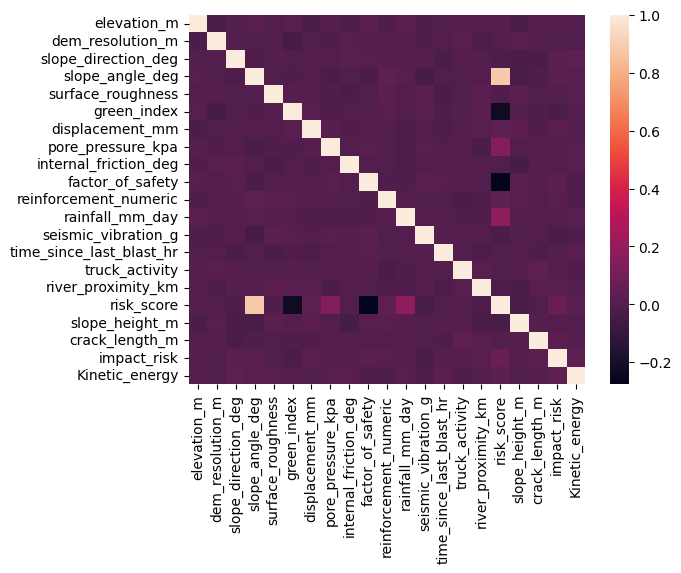

In [ ]:
sns.heatmap(df.corr())

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr = df.corr()

# Focus only on correlation with target
target_corr = corr[["risk_score"]]   # replace with your target column
target_corr.shape


(21, 1)

In [ ]:
target_corr

,risk_score
elevation_m,0.009406
dem_resolution_m,-0.001046
slope_direction_deg,-0.012530
slope_angle_deg,0.882919
surface_roughness,-0.008568
green_index,-0.225338
displacement_mm,0.033353
pore_pressure_kpa,0.152208
internal_friction_deg,-0.005168
factor_of_safety,-0.276522


In [ ]:
target_corr.sort_values(by='risk_score',ascending=False,key=abs)

,risk_score
risk_score,1.000000
slope_angle_deg,0.882919
factor_of_safety,-0.276522
green_index,-0.225338
rainfall_mm_day,0.178754
pore_pressure_kpa,0.152208
impact_risk,0.072118
reinforcement_numeric,0.034984
displacement_mm,0.033353
slope_height_m,-0.029854


<Axes: >

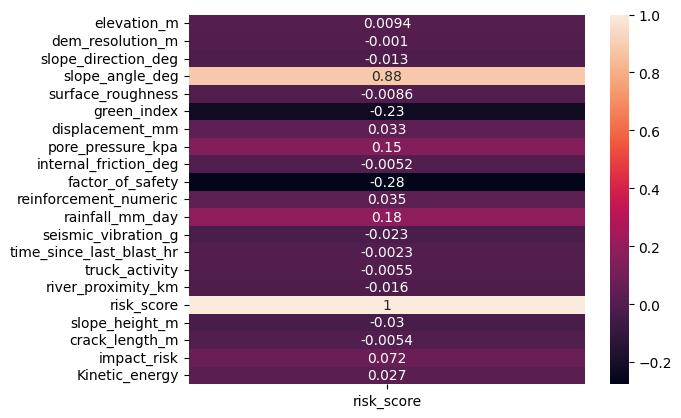

In [ ]:
sns.heatmap(target_corr,annot=True)

In [ ]:
# Get correlations with risk_score, exclude self
target_corr = corr["risk_score"].drop("risk_score")

# Select top 5 features (absolute correlation, but keep sign for direction)
top5_features = target_corr.abs().sort_values(ascending=False).head(5).index.tolist()

print("Top 5 correlated features with risk_score:", top5_features)

# Keep only top 5 + target in the dataframe
df_model = df[top5_features + ["risk_score"]]

print("New dataframe shape:", df_model.shape)


Top 5 correlated features with risk_score: ['slope_angle_deg', 'factor_of_safety', 'green_index', 'rainfall_mm_day', 'pore_pressure_kpa']
New dataframe shape: (4750, 6)


In [ ]:
df_model

,slope_angle_deg,factor_of_safety,green_index,rainfall_mm_day,pore_pressure_kpa,risk_score
0,15.63,1.52,0.99,19.04,9.13,0.09
1,35.70,0.55,0.74,19.86,27.60,0.21
2,30.84,1.71,0.16,6.60,19.57,0.20
3,49.86,1.00,0.29,13.39,23.72,0.26
5,34.51,1.37,0.77,23.97,52.05,0.20
...,...,...,...,...,...,...
4995,45.76,1.17,0.41,18.61,35.36,0.26
4996,37.82,1.32,0.34,1.45,12.87,0.22
4997,32.50,1.09,0.72,4.34,35.86,0.20
4998,35.15,0.41,0.67,1.04,7.53,0.20


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Features and target
X = df_model.drop(columns=["risk_score"])
y = df_model["risk_score"]

# =======================
# Train-Test Split
# =======================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# =======================
# Scale Features
# (Important for Linear, Ridge, Lasso, SVR but not for Trees)
# =======================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# =======================
# Define Models
# =======================
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, random_state=42)
}

# =======================
# Train & Evaluate
# =======================
results = {}

for name, model in models.items():
    if "Regression" in name:  # Scale needed
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:  # Tree models don't need scaling
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    results[name] = {
        "R2 Score": r2_score(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "MAE": mean_absolute_error(y_test, y_pred)
    }

# =======================
# Show Results
# =======================
results_df = pd.DataFrame(results).T
print(results_df.sort_values("R2 Score", ascending=False))

                   R2 Score      RMSE       MAE
Ridge Regression   0.955018  0.010924  0.008259
Linear Regression  0.955014  0.010924  0.008259
Gradient Boosting  0.948515  0.011687  0.008948
Random Forest      0.936077  0.013022  0.009907
Lasso Regression   0.801882  0.022925  0.017953


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Example: df is your dataframe
# Features (X) and Target (y)
X = df.drop(columns=["risk_score"])   # all columns except target
y = df["risk_score"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize Ridge Regression (alpha controls regularization strength)
ridge = Ridge(alpha=0.001, random_state=42)

# Fit the model
ridge.fit(X_train, y_train)

# Predictions
y_pred = ridge.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("Ridge Regression Performance:")
print(f"R2 Score : {r2:.6f}")
print(f"RMSE     : {rmse:.6f}")
print(f"MAE      : {mae:.6f}")


Ridge Regression Performance:
R2 Score : 0.956628
RMSE     : 0.010726
MAE      : 0.008221


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Features (X) and Target (y)
X = df.drop(columns=["risk_score"])   # all columns except target
y = df["risk_score"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define candidate alpha values for tuning
alphas = np.logspace(-3, 3, 20)  # from 0.001 to 1000, 20 values

# Initialize RidgeCV (it will pick the best alpha via CV)
ridge_cv = RidgeCV(alphas=alphas, cv=5)  # 5-fold CV
ridge_cv.fit(X_train, y_train)

# Best alpha chosen
print("Best alpha (regularization strength):", ridge_cv.alpha_)

# Predictions
y_pred = ridge_cv.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("\nRidgeCV Performance:")
print(f"R2 Score : {r2:.6f}")
print(f"RMSE     : {rmse:.6f}")
print(f"MAE      : {mae:.6f}")


Best alpha (regularization strength): 0.001

RidgeCV Performance:
R2 Score : 0.956628
RMSE     : 0.010726
MAE      : 0.008221


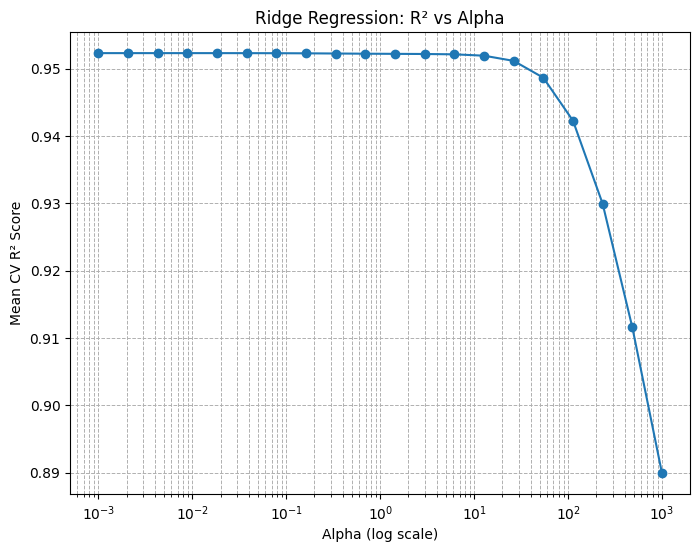

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Candidate alphas
alphas = np.logspace(-3, 3, 20)

mean_r2_scores = []

# Perform CV for each alpha
for a in alphas:
    ridge = Ridge(alpha=a)
    scores = cross_val_score(ridge, X_train, y_train, cv=5, scoring="r2")
    mean_r2_scores.append(scores.mean())

# Plot
plt.figure(figsize=(8,6))
plt.semilogx(alphas, mean_r2_scores, marker="o", linestyle="-")
plt.xlabel("Alpha (log scale)")
plt.ylabel("Mean CV R² Score")
plt.title("Ridge Regression: R² vs Alpha")
plt.grid(True, which="both", linestyle="--", linewidth=0.7)
plt.show()


In [ ]:
# Train Ridge with chosen alpha (say alpha=1.0)
best_ridge = Ridge(alpha=1.0)
best_ridge.fit(X_train, y_train)

# Sample test (first 5 rows from X_test)
sample_X = X_test[:5]
sample_y = y_test[:5]

# Predictions
preds = best_ridge.predict(sample_X)

# Show actual vs predicted
for i in range(len(sample_X)):
    print(f"Sample {i+1}: Actual Risk Score = {sample_y.iloc[i]:.3f}, Predicted = {preds[i]:.3f}")


Sample 1: Actual Risk Score = 0.130, Predicted = 0.134
Sample 2: Actual Risk Score = 0.250, Predicted = 0.247
Sample 3: Actual Risk Score = 0.070, Predicted = 0.075
Sample 4: Actual Risk Score = 0.160, Predicted = 0.158
Sample 5: Actual Risk Score = 0.160, Predicted = 0.156


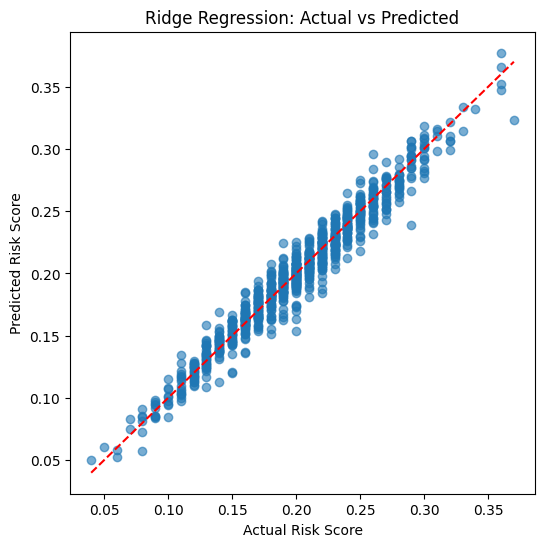

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import Ridge

# Train final Ridge model
best_ridge = Ridge(alpha=1.0)
best_ridge.fit(X_train, y_train)

# Predictions on test set
y_pred = best_ridge.predict(X_test)

# ---- 1. Scatter plot ----
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.xlabel("Actual Risk Score")
plt.ylabel("Predicted Risk Score")
plt.title("Ridge Regression: Actual vs Predicted")
plt.show()

# ---- 2. Export results to CSV ----
results = pd.DataFrame({
    "Actual_Risk_Score": y_test.values,
    "Predicted_Risk_Score": y_pred
})

In [ ]:
df_model.to_csv('final_dataset.csv',index=False)